In [1]:
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
import os
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import OneHotEncoder
import future 
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
seed = 100
np.random.seed(seed)
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Input
import pandas as pd

C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [3]:
# mix
path='C:\\Users\\user\\Desktop\\project\\picture_mix_train'
folder_list =[]
folder = glob.glob(path)
for folder in folder :
    for name in glob.glob(folder+'/*'):
        folder_list.append(name)

image_name =[]
for folder in folder_list:
    for name in glob.glob(folder+'/*.jpg') :
        image_name.append(name)
        
read_images = []
for image in image_name:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    read_images.append(img)
read_images = np.array(read_images)
print ('Images are all in read_images')     
print(read_images.shape) 

Images are all in read_images
(30000, 100, 100)


In [4]:
x = read_images
#split = np.random.choice(40000,8000,replace=False)

y = np.array(np.repeat(range(1,7),5000).reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=seed,shuffle=True) 
x_test = x_test.reshape(x_test.shape[0],100,100,1)
x_train = x_train.reshape(x_train.shape[0],100,100,1)

print('Shape of x_train is (%d,%d,%d,%d)'%(x_train.shape))
print('Shape of x_test is (%d,%d,%d,%d)'%(x_test.shape))
print('Shape of y_train is (%d,%d)'%(y_train.shape))
print('Shape of y_test is (%d,%d)'%(y_test.shape))
onehot = OneHotEncoder()

y_train = onehot.fit_transform(y_train).toarray()
y_test_ori = y_test
y_test = onehot.fit_transform(y_test).toarray()
print('Shape of y_train is (%d,%d)'%(y_train.shape))

Shape of x_train is (24000,100,100,1)
Shape of x_test is (6000,100,100,1)
Shape of y_train is (24000,1)
Shape of y_test is (6000,1)
Shape of y_train is (24000,6)


# 訓練6種 stage01的 model

In [5]:
tensorboard = TensorBoard(log_dir= 'logs\{}'.format('Tf')) 
  
input_tensor = Input(shape=(100, 100, 1))
model_inv3_mix_30_1 = Sequential()
model_inv3_mix_30_1.add(InceptionV3(input_tensor=input_tensor,weights=None, include_top=False))
model_inv3_mix_30_1.add(Flatten())
model_inv3_mix_30_1.add(Dense(6,activation = 'sigmoid'))

filepath="C:\\Users\\user\\Desktop\\project\\inceptionv3_picture_mix\\checkpoint30_record\\model_iter30_1.hdf5" 

checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True,
mode='max')

model_inv3_mix_30_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
train_history_30_1 = model_inv3_mix_30_1.fit(x=x_train, y=y_train, validation_split=0.3, epochs=30, batch_size=80, verbose=2,shuffle = True,callbacks = [checkpoint , tensorboard])  

                                                                          #改
with open(file=r'C:\Users\user\Desktop\project\inceptionv3_picture_mix\train_history_30\train_history_30_1.lst',mode="wb") as outhis:     
                                                    
    pickle.dump(train_history_30_1.history, outhis)  

                                                                    


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 16800 samples, validate on 7200 samples
Epoch 1/30

Epoch 00001: acc improved from -inf to 0.86739, saving model to C:\Users\user\Desktop\project\inceptionv3_picture_mix\checkpoint30_record\model_iter30_1.hdf5
16800/16800 - 36s - loss: 0.3152 - acc: 0.8674 - val_loss: 0.5110 - val_acc: 0.8212
Epoch 2/30

Epoch 00002: acc improved from 0.86739 to 0.89768, saving model to C:\Users\user\Desktop\project\inceptionv3_picture_mix\checkpoint30_record\model_iter30_1.hdf5
16800/16800 - 26s - loss: 0.2367 - acc: 0.8977 - val_loss: 0.3102 - val_acc: 0.8631
Epoch 3/30

Epoch 00003: acc improved from 0.89768 to 0.92053, saving model to C:\Users\user\Desktop\project\inceptionv3_picture_mix\checkpoint30_record\model_iter30_1.hdf5
16800/16800 - 26s - loss: 0.1851 - acc: 0.9205 - val_lo

In [7]:
model_inv3_mix_30_1.predict(x_test)

array([[2.6366115e-04, 2.0682812e-04, 2.6416779e-04, 9.9482965e-01,
        5.6207180e-05, 4.0104985e-03],
       [9.9999559e-01, 5.9604645e-08, 5.9604645e-08, 2.0861626e-07,
        0.0000000e+00, 2.6822090e-07],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        9.9999988e-01, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [2.1912807e-01, 7.0160627e-04, 3.6031008e-04, 4.4440091e-02,
        2.8148293e-04, 6.8388391e-01],
       [6.5556645e-01, 3.6269426e-05, 3.3020973e-05, 3.9405003e-01,
        8.5026026e-05, 1.8927157e-03]], dtype=float32)

In [21]:
prediction = np.argmax(score,axis= 1)
prediction

array([1, 0, 4, ..., 4, 5, 0], dtype=int64)

In [8]:
def plot_confusion_matrix(cm, classes,acc,
                          title='Confusion matrix',
                          cmap=plt.cm.jet):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
   # plt.suptitle('VGG16(Picture 01)',y=1.01,fontsize=14)
    plt.title(title+'(accuracy='+str(acc)+')')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,np.arange(1,8+1) , rotation=45)
    plt.yticks(tick_marks,np.arange(1,8+1)  )
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.2f}'.format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
  #  plt.savefig(r'C:\Users\user\Desktop\project\final_model\vgg_picture\confusion_matrix_vgg16_picture01.jpg') 
    plt.show()

    
    
    
# 显示混淆矩阵
def plot_confuse(model, x_val, y_val,acc):
    predictions = model.predict_classes(x_val)
    truelabel = y_val.argmax(axis=-1)   # 将one-hot转化为label
    conf_mat = confusion_matrix(y_true=truelabel, y_pred=predictions)
    plt.figure()
    plot_confusion_matrix(conf_mat, range(np.max(truelabel)+1),acc)
   

6000/6000 [==============================] - 3s 561us/sample - loss: 0.3547 - acc: 0.9152


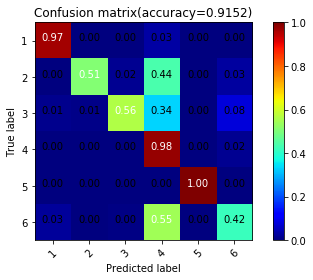

In [10]:
a=model_inv3_mix_30_1.evaluate(x_test,y_test)
plot_confuse(model_inv3_mix_30_1, x_test, y_test,round(a[1],4))

# stage02 拿掉馬賽克-1

In [20]:
path='C:\\Users\\user\\Desktop\\project\\picture_mix_train_1'
folder_list =[]
folder = glob.glob(path)
for folder in folder :
    for name in glob.glob(folder+'/*'):
        folder_list.append(name)

image_name =[]
for folder in folder_list:
    for name in glob.glob(folder+'/*.jpg') :
        image_name.append(name)
        
read_images = []
for image in image_name:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    read_images.append(img)
read_images = np.array(read_images)
print ('Images are all in read_images')     
print(read_images.shape) 



x = read_images
#split = np.random.choice(40000,8000,replace=False)

y = np.array(np.repeat(range(1,6),5000).reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=seed,shuffle=True) 
x_test = x_test.reshape(x_test.shape[0],100,100,1)
x_train = x_train.reshape(x_train.shape[0],100,100,1)

print('Shape of x_train is (%d,%d,%d,%d)'%(x_train.shape))
print('Shape of x_test is (%d,%d,%d,%d)'%(x_test.shape))
print('Shape of y_train is (%d,%d)'%(y_train.shape))
print('Shape of y_test is (%d,%d)'%(y_test.shape))
onehot = OneHotEncoder()

y_train = onehot.fit_transform(y_train).toarray()
y_test_ori = y_test
y_test = onehot.fit_transform(y_test).toarray()
print('Shape of y_train is (%d,%d)'%(y_train.shape))


Images are all in read_images
(25000, 100, 100)
Shape of x_train is (20000,100,100,1)
Shape of x_test is (5000,100,100,1)
Shape of y_train is (20000,1)
Shape of y_test is (5000,1)
Shape of y_train is (20000,5)


In [21]:
tensorboard = TensorBoard(log_dir= 'logs\{}'.format('Tf')) 
  
input_tensor = Input(shape=(100, 100, 1))
model_inv3_mix_30_d1 = Sequential()
model_inv3_mix_30_d1.add(InceptionV3(input_tensor=input_tensor,weights=None, include_top=False))
model_inv3_mix_30_d1.add(Flatten())
model_inv3_mix_30_d1.add(Dense(5,activation = 'sigmoid'))

filepath="C:\\Users\\user\\Desktop\\project\\inceptionv3_picture_mix\\checkpoint30_record\\model_iter30_d1.hdf5" 

checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True,
mode='max')

model_inv3_mix_30_d1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
train_history_30_d1 = model_inv3_mix_30_d1.fit(x=x_train, y=y_train, validation_split=0.3, epochs=30, batch_size=80, verbose=2,shuffle = True,callbacks = [checkpoint , tensorboard])  

                                                                          #改
with open(file=r'C:\Users\user\Desktop\project\inceptionv3_picture_mix\train_history_30\train_history_30_d1.lst',mode="wb") as outhis:     
                                                    
    pickle.dump(train_history_30_d1.history, outhis)  

                                                                    


Train on 14000 samples, validate on 6000 samples
Epoch 1/30

Epoch 00001: acc improved from -inf to 0.84880, saving model to C:\Users\user\Desktop\project\inceptionv3_picture_mix\checkpoint30_record\model_iter30_d1.hdf5
14000/14000 - 31s - loss: 0.3354 - acc: 0.8488 - val_loss: 0.6123 - val_acc: 0.7165
Epoch 2/30

Epoch 00002: acc improved from 0.84880 to 0.87184, saving model to C:\Users\user\Desktop\project\inceptionv3_picture_mix\checkpoint30_record\model_iter30_d1.hdf5
14000/14000 - 22s - loss: 0.2736 - acc: 0.8718 - val_loss: 0.3648 - val_acc: 0.8392
Epoch 3/30

Epoch 00003: acc improved from 0.87184 to 0.89134, saving model to C:\Users\user\Desktop\project\inceptionv3_picture_mix\checkpoint30_record\model_iter30_d1.hdf5
14000/14000 - 22s - loss: 0.2425 - acc: 0.8913 - val_loss: 0.2746 - val_acc: 0.8757
Epoch 4/30

Epoch 00004: acc improved from 0.89134 to 0.90949, saving model to C:\Users\user\Desktop\project\inceptionv3_picture_mix\checkpoint30_record\model_iter30_d1.hdf5
14000/

# stage02 拿掉-內縮2

In [24]:
path='C:\\Users\\user\\Desktop\\project\\picture_mix_train_2'
folder_list =[]
folder = glob.glob(path)
for folder in folder :
    for name in glob.glob(folder+'/*'):
        folder_list.append(name)

image_name =[]
for folder in folder_list:
    for name in glob.glob(folder+'/*.jpg') :
        image_name.append(name)
        
read_images = []
for image in image_name:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    read_images.append(img)
read_images = np.array(read_images)
print ('Images are all in read_images')     
print(read_images.shape) 

Images are all in read_images
(25000, 100, 100)


In [25]:

x = read_images
#split = np.random.choice(40000,8000,replace=False)

y = np.array(np.repeat(range(1,6),5000).reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=seed,shuffle=True) 
x_test = x_test.reshape(x_test.shape[0],100,100,1)
x_train = x_train.reshape(x_train.shape[0],100,100,1)

print('Shape of x_train is (%d,%d,%d,%d)'%(x_train.shape))
print('Shape of x_test is (%d,%d,%d,%d)'%(x_test.shape))
print('Shape of y_train is (%d,%d)'%(y_train.shape))
print('Shape of y_test is (%d,%d)'%(y_test.shape))
onehot = OneHotEncoder()

y_train = onehot.fit_transform(y_train).toarray()
y_test_ori = y_test
y_test = onehot.fit_transform(y_test).toarray()
print('Shape of y_train is (%d,%d)'%(y_train.shape))


Shape of x_train is (20000,100,100,1)
Shape of x_test is (5000,100,100,1)
Shape of y_train is (20000,1)
Shape of y_test is (5000,1)
Shape of y_train is (20000,5)


In [26]:
tensorboard = TensorBoard(log_dir= 'logs\{}'.format('Tf')) 
  
input_tensor = Input(shape=(100, 100, 1))
model_inv3_mix_30_d2 = Sequential()
model_inv3_mix_30_d2.add(InceptionV3(input_tensor=input_tensor,weights=None, include_top=False))
model_inv3_mix_30_d2.add(Flatten())
model_inv3_mix_30_d2.add(Dense(5,activation = 'sigmoid'))

filepath="C:\\Users\\user\\Desktop\\project\\inceptionv3_picture_mix\\checkpoint30_record\\model_iter30_d2.hdf5" 

checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True,
mode='max')

model_inv3_mix_30_d2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
train_history_30_d2 = model_inv3_mix_30_d2.fit(x=x_train, y=y_train, validation_split=0.3, epochs=30, batch_size=80, verbose=2,shuffle = True,callbacks = [checkpoint , tensorboard])  

                                                                          #改
with open(file=r'C:\Users\user\Desktop\project\inceptionv3_picture_mix\train_history_30\train_history_30_d2.lst',mode="wb") as outhis:     
                                                    
    pickle.dump(train_history_30_d2.history, outhis)  


Train on 14000 samples, validate on 6000 samples
Epoch 1/30

Epoch 00001: acc improved from -inf to 0.86627, saving model to C:\Users\user\Desktop\project\inceptionv3_picture_mix\checkpoint30_record\model_iter30_d2.hdf5
14000/14000 - 33s - loss: 0.2946 - acc: 0.8663 - val_loss: 0.5712 - val_acc: 0.7549
Epoch 2/30

Epoch 00002: acc improved from 0.86627 to 0.91406, saving model to C:\Users\user\Desktop\project\inceptionv3_picture_mix\checkpoint30_record\model_iter30_d2.hdf5
14000/14000 - 22s - loss: 0.1920 - acc: 0.9141 - val_loss: 0.3771 - val_acc: 0.8641
Epoch 3/30

Epoch 00003: acc improved from 0.91406 to 0.92864, saving model to C:\Users\user\Desktop\project\inceptionv3_picture_mix\checkpoint30_record\model_iter30_d2.hdf5
14000/14000 - 22s - loss: 0.1559 - acc: 0.9286 - val_loss: 0.1511 - val_acc: 0.9332
Epoch 4/30

Epoch 00004: acc improved from 0.92864 to 0.93840, saving model to C:\Users\user\Desktop\project\inceptionv3_picture_mix\checkpoint30_record\model_iter30_d2.hdf5
14000/

In [29]:
#  先讀  3個  mix 加進來

# mix
path='C:\\Users\\user\\Desktop\\project\\test12'
folder_list =[]
folder = glob.glob(path)
for folder in folder :
    for name in glob.glob(folder+'/*'):
        folder_list.append(name)

image_name =[]
for folder in folder_list:
    for name in glob.glob(folder+'/*.jpg') :
        image_name.append(name)
        
read_images = []
for image in image_name:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    read_images.append(img)
read_images = np.array(read_images)
print ('Images are all in read_images')
print(read_images.shape)
###########################################################
x = read_images
#split = np.random.choice(40000,8000,replace=False)

y = np.array(np.repeat(range(1),200).reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.9, random_state=seed,shuffle=True) 
x_test = x_test.reshape(x_test.shape[0],100,100,1)
x_train = x_train.reshape(x_train.shape[0],100,100,1)

print('Shape of x_train is (%d,%d,%d,%d)'%(x_train.shape))
print('Shape of x_test is (%d,%d,%d,%d)'%(x_test.shape))
print('Shape of y_train is (%d,%d)'%(y_train.shape))
print('Shape of y_test is (%d,%d)'%(y_test.shape))
onehot = OneHotEncoder()

y_train = onehot.fit_transform(y_train).toarray()
y_test_ori = y_test
y_test = onehot.fit_transform(y_test).toarray()

print('Shape of y_test_ori is (%d,%d)'%(y_test_ori.shape))



Images are all in read_images
(200, 100, 100)
Shape of x_train is (20,100,100,1)
Shape of x_test is (180,100,100,1)
Shape of y_train is (20,1)
Shape of y_test is (180,1)
Shape of y_test_ori is (180,1)


In [ ]:
# stage01 test

In [31]:
a=model_inv3_mix_30_1.predict(x_test)   #分出馬賽克
predict=np.argmax(a,axis= 1)
predict[0:30]

array([0, 3, 1, 0, 0, 0, 3, 3, 5, 5, 0, 0, 0, 3, 5, 0, 0, 3, 2, 3, 3, 3,
       0, 5, 5, 0, 5, 0, 5, 3], dtype=int64)

In [ ]:
# stage02 test drop 1

In [33]:
b=model_inv3_mix_30_d1.predict(x_test)

In [34]:
predict=np.argmax(b,axis= 1) # 原圖
predict[0:30]

array([2, 1, 4, 4, 4, 1, 1, 4, 4, 4, 4, 4, 2, 2, 4, 1, 2, 4, 1, 4, 2, 4,
       1, 4, 4, 4, 2, 1, 2, 1], dtype=int64)

In [12]:
# predict=model.predict(x_test)
# 單看三種混合的準確度---兩個都對，才算對


def type3_mix_accuracy(y_test_ori,predict):
    y_test_ori=pd.DataFrame(y_test_ori)
    y_test_ori=y_test_ori.rename(columns={0:'truelabel'})
    y_test_ori['true01']=np.where(y_test_ori['truelabel']==1,1,np.where(y_test_ori['truelabel']==2,3,4))
    y_test_ori['true02']=np.where(y_test_ori['truelabel']==1,2,np.where(y_test_ori['truelabel']==2,4,5))
    y_test_ori['true03']=6
    
    a=pd.DataFrame(predict)
    a=a.rename(columns={0:1, 1:2,2:3,3:4,4:5,5:6})

    a['max_value']=a.max(axis=1)
    a['second_large_value']=0
    

    a['max']=np.argmax(predict,axis=1)+1
    a['second_large']=0
    
    

    for i in range(0,(a.shape[0])):
        tmp_list=0
        num_list=a.iloc[i,0:6]
        tmp_list=sorted(num_list)
        a['second_large_value'].iloc[i]=tmp_list[-2]
        a['second_large'].iloc[i]=np.where(num_list==tmp_list[-2])[0][0]+1
        
   
        
    b = pd.merge(y_test_ori, a, how='left',on=y_test_ori.index)
    b['acc']=0

    for i in range(0,(b.shape[0])):
        con1=[str(b['true01'][i]),str(b['true02'][i])]
        con1=sorted(con1)
        con2=[str(b['max'][i]),str(b['second_large'][i])]
        con2=sorted(con2)

        
        b['acc'].iloc[i]=np.where(con1==con2,1,0)

    return (print('三種混合的準確率{}'.format(b['acc'].sum()/b.shape[0])))

In [13]:
#model=load_model(r'C:\Users\user\Desktop\project\final_model\vgg_picture_mix\model_iter60_10.hdf5')
predict=model_inv3_mix_30_1.predict(x_test)
type3_mix_accuracy(y_test_ori,predict)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


三種混合的準確率0.007407407407407408


In [14]:
    y_test_ori=pd.DataFrame(y_test_ori)
    y_test_ori=y_test_ori.rename(columns={0:'truelabel'})
    y_test_ori['true01']=np.where(y_test_ori['truelabel']==1,1,np.where(y_test_ori['truelabel']==2,3,4))
    y_test_ori['true02']=np.where(y_test_ori['truelabel']==1,2,np.where(y_test_ori['truelabel']==2,4,5))
   
    
    a=pd.DataFrame(predict)
    a=a.rename(columns={0:1, 1:2,2:3,3:4,4:5,5:6})

    a['max_value']=a.max(axis=1)
    a['second_large_value']=0
    

    a['max']=np.argmax(predict,axis=1)+1
    a['second_large']=0
    
    

    for i in range(0,(a.shape[0])):
        tmp_list=0
        num_list=a.iloc[i,0:6]
        tmp_list=sorted(num_list)
        a['second_large_value'].iloc[i]=tmp_list[-2]
        a['second_large'].iloc[i]=np.where(num_list==tmp_list[-2])[0][0]+1
        
   
        
    b = pd.merge(y_test_ori, a, how='left',on=y_test_ori.index)
    b['acc']=0

    for i in range(0,(b.shape[0])):
        con1=[str(b['true01'][i]),str(b['true02'][i])]
        con1=sorted(con1)
        con2=[str(b['max'][i]),str(b['second_large'][i])]
        con2=sorted(con2)

        
        b['acc'].iloc[i]=np.where(con1==con2,1,0)


In [15]:
b[1:30]

,key_0,truelabel,true01,true02,1,2,3,4,5,6,max_value,second_large_value,max,second_large,acc
1,1,2,3,4,0.000132,3.272295e-05,1.112819e-04,0.986354,4.273653e-05,0.013507,0.986354,0.013507,4,6,0
2,2,2,3,4,0.000937,1.311630e-03,3.190488e-03,0.928702,3.132224e-04,0.065215,0.928702,0.065215,4,6,0
3,3,2,3,4,0.000004,2.980232e-07,1.072884e-06,0.999655,8.642673e-07,0.000089,0.999655,0.000089,4,6,0
4,4,3,4,5,0.000260,3.883243e-05,1.306832e-04,0.978533,6.255507e-05,0.020395,0.978533,0.020395,4,6,0
5,5,3,4,5,0.000080,3.713369e-05,1.552403e-04,0.947533,7.197261e-05,0.053946,0.947533,0.053946,4,6,0
6,6,2,3,4,0.001914,8.967519e-05,1.081824e-04,0.932968,1.818538e-04,0.057861,0.932968,0.057861,4,6,0
7,7,1,1,2,0.973287,7.101893e-05,4.714429e-04,0.014396,9.131432e-05,0.007199,0.973287,0.014396,1,4,0
8,8,1,1,2,0.076774,6.322655e-02,4.205352e-02,0.695300,2.876282e-03,0.133306,0.695300,0.133306,4,6,0
9,9,1,1,2,0.116024,1.420379e-04,4.039139e-03,0.316291,4.066229e-04,0.247790,0.316291,0.247790,4,6,0
10,10,3,4,5,0.000139,8.374453e-06,4.646182e-05,0.002505,1.162291e-05,0.995919,0.995919,0.002505,6,4,0
